In [ ]:
save_name = 'CustomPneumonia_Pneumonia'

In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.CustomPneumonia import CustomPneumoniaNN

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')


Working on device=cuda


In [4]:
training_columns = ['Pneumonia']
out_channels=len(training_columns)
net_kwargs = {'out_channels':out_channels}
net = CustomPneumoniaNN(**net_kwargs)

net = nn.DataParallel(net)
net.to(device)

summary(net, (1, 320, 320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 512, 320, 320]          13,312
       BatchNorm2d-2        [-1, 512, 320, 320]           1,024
         MaxPool2d-3        [-1, 512, 160, 160]               0
            Conv2d-4        [-1, 256, 160, 160]       1,179,904
       BatchNorm2d-5        [-1, 256, 160, 160]             512
         MaxPool2d-6          [-1, 256, 80, 80]               0
            Conv2d-7           [-1, 64, 80, 80]         147,520
       BatchNorm2d-8           [-1, 64, 80, 80]             128
         MaxPool2d-9           [-1, 64, 40, 40]               0
           Linear-10                 [-1, 1024]     104,858,624
          Dropout-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
          Dropout-13                  [-1, 512]               0
           Linear-14                   

In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=8, 
                                     learning_rate=1e-5, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     target_columns=training_columns,
                                     save_path= f'notebooks/saved/{save_name}/',
                                     net_name = 'CustomPneumoniaNN',
                                     net_kwargs = net_kwargs)

C:\git\Springboard-Public\Capstone Project 2\modules\lib\ChextXRayImages.py:251: UserWarning: 
Feature Imbalance Detected (train % - val %):
   Lung_Opacity: 15.04%
   Edema: 6.67%
   Pleural_Effusion: 4.44%

  self.warnFeatureImbalance(train, value)


Number of Training Images: 393
Number of Validation Images: 107


In [6]:
standardTraining.train()

Epoch [1/4]
Epoch Loss: 565.1020         
Training Time: 0:00:29.636774)          
Validation Time: 0:00:01.833129)

TRAINING



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.044444,0.090909,0.059701,0.478161,0.108959
4,Edema,96,0.135417,0.200000,0.161491,0.500316,0.241240
5,Consolidation,19,0.000000,0.000000,0.000000,0.564875,0.056761
7,Atelectasis,62,0.080645,0.125000,0.098039,0.493227,0.158163
9,Pleural_Effusion,135,0.311111,0.355932,0.332016,0.515303,0.356790



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.000,0.000000,0.000000,0.460829,0.121823
4,Edema,19,0.000,0.000000,0.000000,0.501196,0.203636
5,Consolidation,4,0.000,0.000000,0.000000,0.449029,0.045589
7,Atelectasis,15,0.000,0.000000,0.000000,0.350725,0.110336
9,Pleural_Effusion,32,0.125,0.307692,0.177778,0.426667,0.266898


Epoch [2/4]
Epoch Loss: 188.0543         
Training Time: 0:00:35.283680)          
Validation Time: 0:00:02.812481)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.066667,0.214286,0.101695,0.594828,0.176608
4,Edema,96,0.104167,0.263158,0.149254,0.509820,0.245711
5,Consolidation,19,0.000000,0.000000,0.000000,0.434422,0.042440
7,Atelectasis,62,0.032258,0.086957,0.047059,0.484894,0.163486
9,Pleural_Effusion,135,0.177778,0.324324,0.229665,0.487138,0.350749



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,0.518049,0.167038
4,Edema,19,0.0,0.0,0.0,0.391746,0.155217
5,Consolidation,4,0.0,0.0,0.0,0.492718,0.066449
7,Atelectasis,15,0.0,0.0,0.0,0.526087,0.154446
9,Pleural_Effusion,32,0.0,0.0,0.0,0.406250,0.251946


Epoch [3/4]
Epoch Loss: 188.2179         
Training Time: 0:00:46.166588)          
Validation Time: 0:00:02.792535)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.022222,0.047619,0.030303,0.509387,0.112720
4,Edema,96,0.072917,0.189189,0.105263,0.499544,0.242175
5,Consolidation,19,0.000000,0.000000,0.000000,0.491134,0.051417
7,Atelectasis,62,0.016129,0.083333,0.027027,0.476221,0.151013
9,Pleural_Effusion,135,0.177778,0.363636,0.238806,0.489836,0.348584



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,0.551459,0.162890
4,Edema,19,0.0,0.0,0.0,0.421053,0.172945
5,Consolidation,4,0.0,0.0,0.0,0.524272,0.051200
7,Atelectasis,15,0.0,0.0,0.0,0.452174,0.127901
9,Pleural_Effusion,32,0.0,0.0,0.0,0.349167,0.228449


Epoch [4/4]
Epoch Loss: 159.0013         
Training Time: 0:00:45.960140)          
Validation Time: 0:00:02.349718)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.409195,0.099792
4,Edema,96,0.041667,0.571429,0.077670,0.493196,0.270832
5,Consolidation,19,0.000000,0.000000,0.000000,0.469040,0.044402
7,Atelectasis,62,0.000000,0.000000,0.000000,0.550336,0.190036
9,Pleural_Effusion,135,0.044444,0.461538,0.081081,0.488831,0.342120



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,0.621352,0.235948
4,Edema,19,0.0,0.0,0.0,0.433014,0.199662
5,Consolidation,4,0.0,0.0,0.0,0.844660,0.142693
7,Atelectasis,15,0.0,0.0,0.0,0.502174,0.173926
9,Pleural_Effusion,32,0.0,0.0,0.0,0.508750,0.334003



TRAINING



,Score for all Targets
Accuracy Score,0.139949
Hamming Loss,0.140797
Combined Recall,0.089313
Combined Precision,0.154792
Combined F1,0.105574


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,22,0.000000,0.000000,0.000000,0.537736,0.066770
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.409195,0.099792
2,Lung_Opacity,195,0.302564,0.500000,0.376997,0.468583,0.472304
3,Lung_Lesion,24,0.041667,0.333333,0.074074,0.489273,0.076996
4,Edema,96,0.041667,0.571429,0.077670,0.493196,0.270832
5,Consolidation,19,0.000000,0.000000,0.000000,0.469040,0.044402
6,Pneumonia,6,0.000000,0.000000,0.000000,0.503876,0.027528
7,Atelectasis,62,0.000000,0.000000,0.000000,0.550336,0.190036
8,Pneumothorax,38,0.000000,0.000000,0.000000,0.523277,0.111760
9,Pleural_Effusion,135,0.044444,0.461538,0.081081,0.488831,0.342120


***** ROC *****


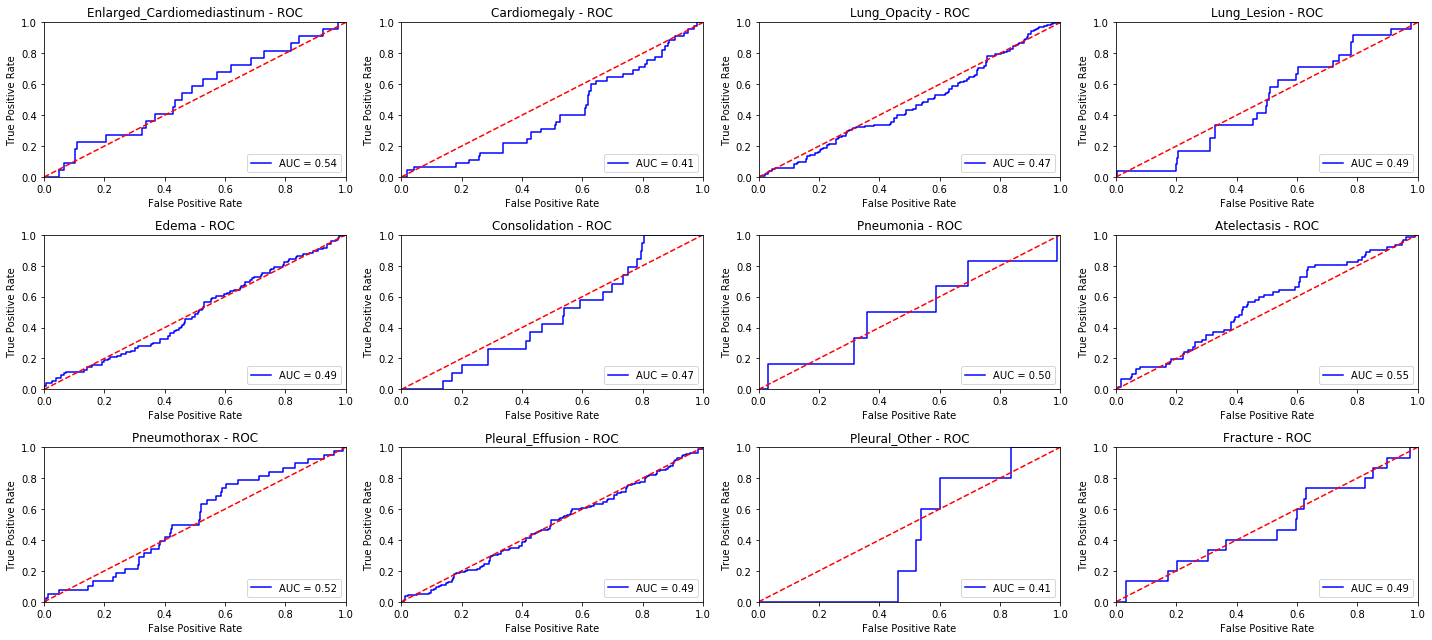

***** Precision / Recall *****


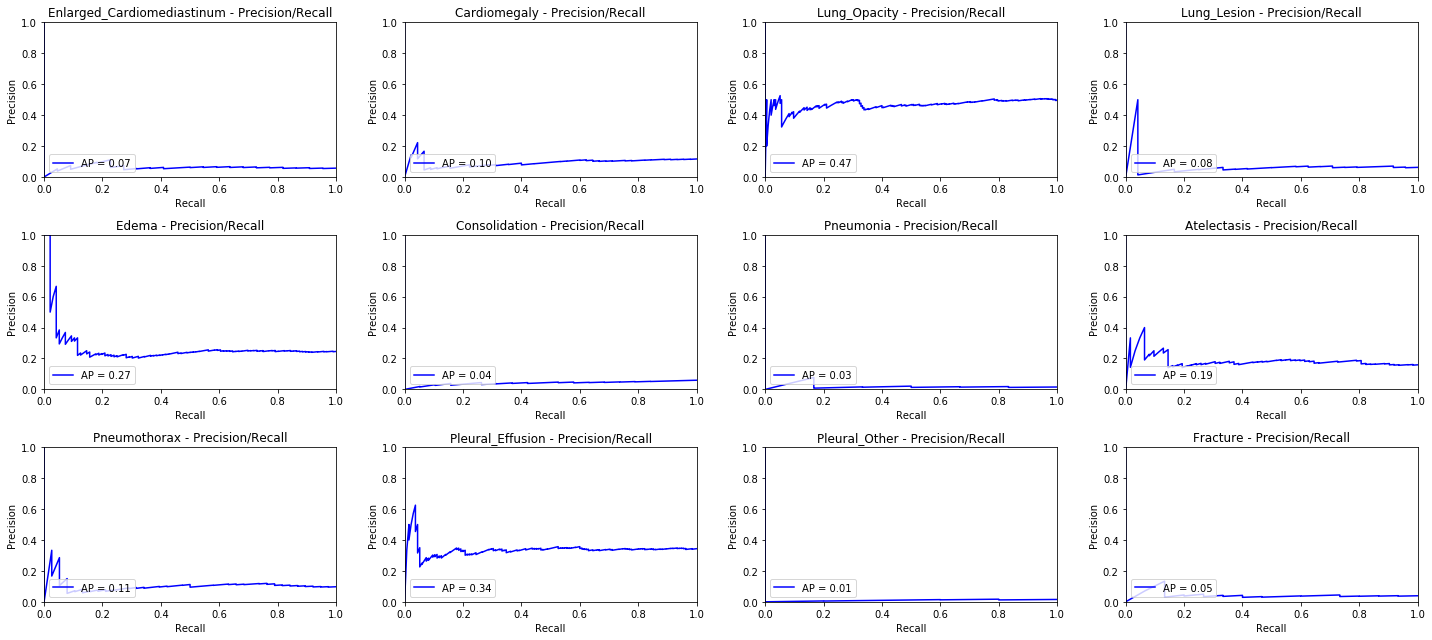


VALIDATION



,Score for all Targets
Accuracy Score,0.214953
Hamming Loss,0.120717
Combined Recall,0.020249
Combined Precision,0.037383
Combined F1,0.024922


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5,0.000000,0.000000,0.00,0.521569,0.078509
1,Cardiomegaly,14,0.000000,0.000000,0.00,0.621352,0.235948
2,Lung_Opacity,37,0.108108,0.307692,0.16,0.458687,0.327778
3,Lung_Lesion,5,0.000000,0.000000,0.00,0.435294,0.046441
4,Edema,19,0.000000,0.000000,0.00,0.433014,0.199662
5,Consolidation,4,0.000000,0.000000,0.00,0.844660,0.142693
6,Pneumonia,4,0.000000,0.000000,0.00,0.762136,0.107028
7,Atelectasis,15,0.000000,0.000000,0.00,0.502174,0.173926
8,Pneumothorax,10,0.000000,0.000000,0.00,0.474227,0.113129
9,Pleural_Effusion,32,0.000000,0.000000,0.00,0.508750,0.334003


***** ROC *****


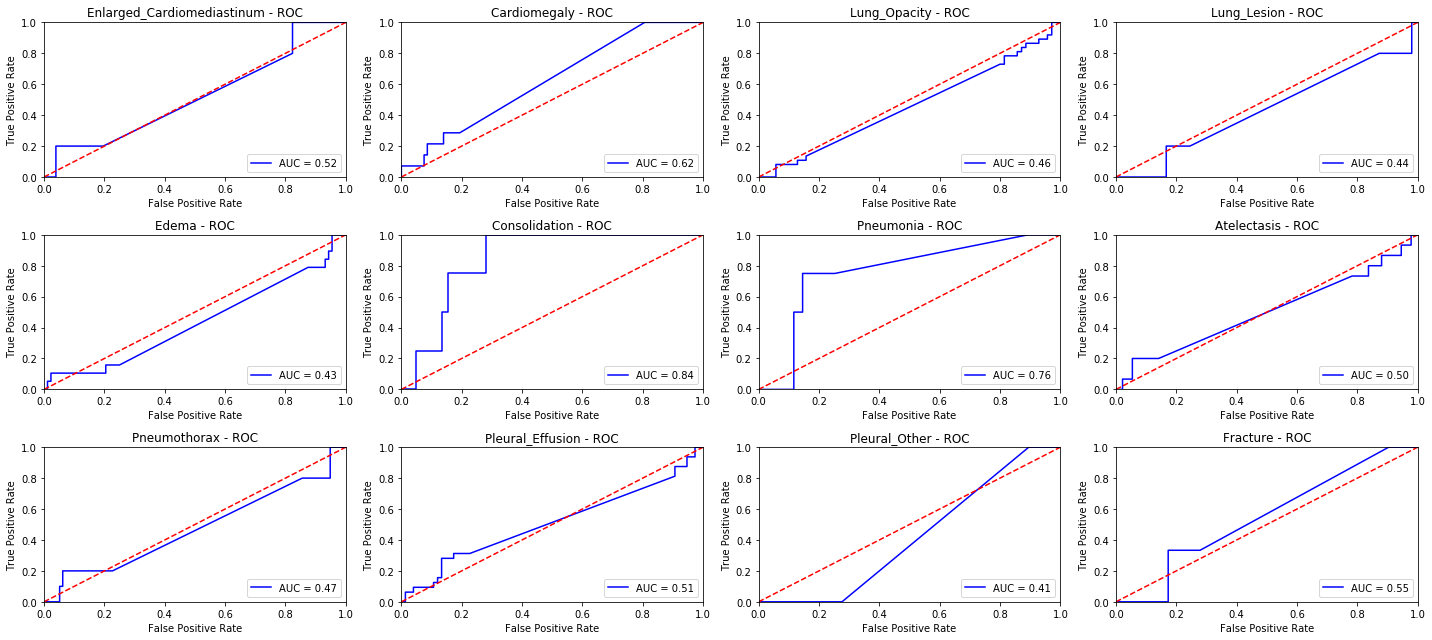

***** Precision / Recall *****


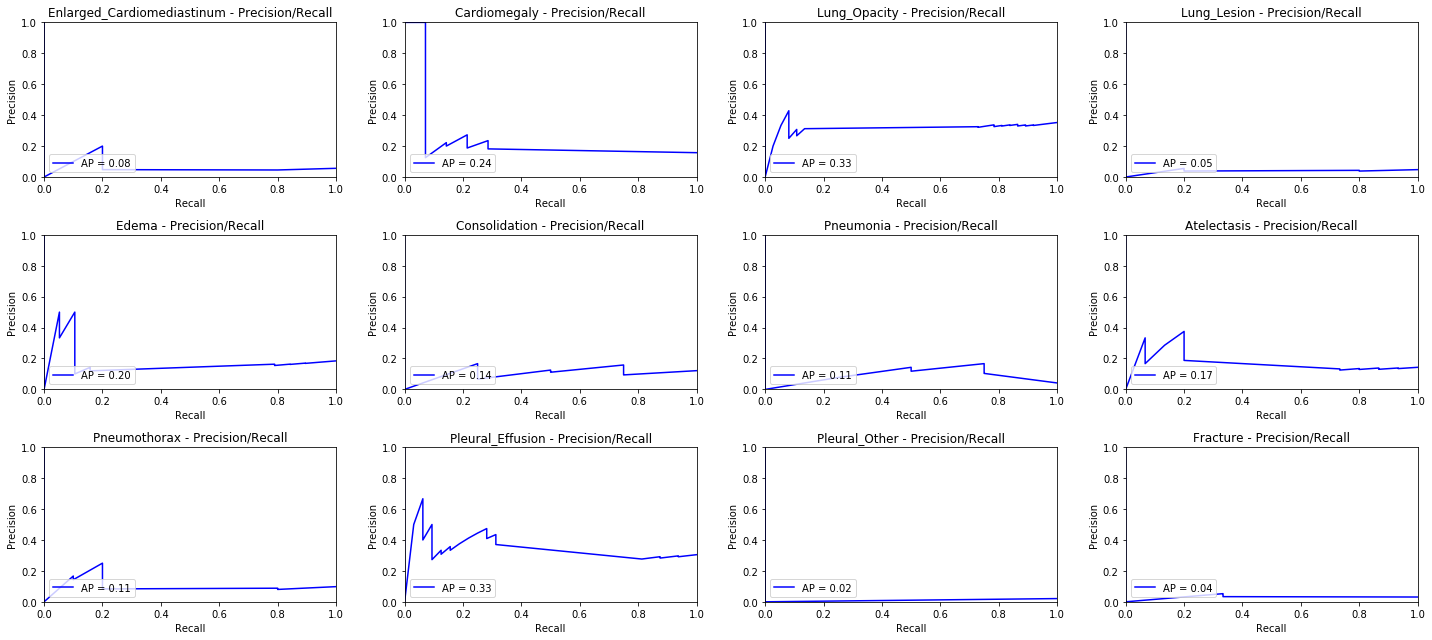

In [7]:
standardTraining.displayMetrics()